<a href="https://colab.research.google.com/github/chungimungi/Color-prediction/blob/main/color_gen_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy
!pip install matplotlib

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, SimpleRNN, GRU, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

np.random.seed(10)
data = pd.read_csv('colors.csv')
names = data["name"]

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = sequence.pad_sequences(tokenized, maxlen=maxlen)

def scale(n):
    return int(n * 255)

normalized_values = np.column_stack([data["red"], data["green"], data["blue"]])
normalized_values = normalized_values / 255.0

model = Sequential()
model.add(Bidirectional(LSTM(64, activation='tanh'), input_shape=(maxlen, 3)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dropout(0.2))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1), normalized_values, epochs=200, batch_size=64, validation_split=0.20)

def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2, 2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.repeat(padded[:, :, np.newaxis], 3, axis=-1))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)

Epoch 1/200
180/180 [==============================] - 18s 26ms/step - loss: 0.1393 - acc: 0.5103 - val_loss: 0.0777 - val_acc: 0.6428
Epoch 2/200
180/180 [==============================] - 2s 12ms/step - loss: 0.1387 - acc: 0.5245 - val_loss: 0.0796 - val_acc: 0.6191
Epoch 3/200
180/180 [==============================] - 3s 19ms/step - loss: 0.1370 - acc: 0.5249 - val_loss: 0.0763 - val_acc: 0.5717
Epoch 4/200
180/180 [==============================] - 2s 11ms/step - loss: 0.1366 - acc: 0.5390 - val_loss: 0.0797 - val_acc: 0.6368
Epoch 5/200
180/180 [==============================] - 1s 8ms/step - loss: 0.1357 - acc: 0.5450 - val_loss: 0.0808 - val_acc: 0.6149
Epoch 6/200
180/180 [==============================] - 1s 7ms/step - loss: 0.1357 - acc: 0.5418 - val_loss: 0.0758 - val_acc: 0.6386
Epoch 7/200
180/180 [==============================] - 1s 7ms/step - loss: 0.1357 - acc: 0.5498 - val_loss: 0.0778 - val_acc: 0.5881
Epoch 8/200
180/180 [==============================] - 1s 8ms/st

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 128)               34816     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
Total params: 68227 (266.51 KB)
Trainable params: 68227 (266.51 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

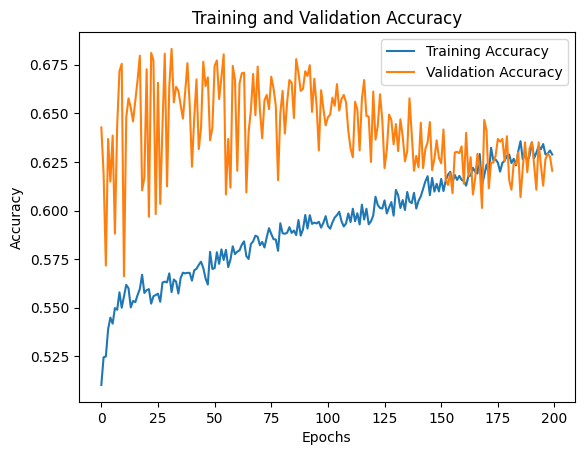

In [4]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

brick red
1/1 [==============================] - 0s 18ms/step
brick red, R,G,B: 124 25 38


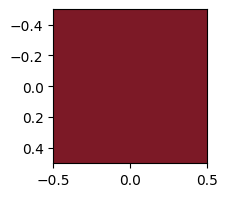

In [19]:
n = input()
predict(n)